
### 1. BUSINESS UNDERSTANDING (Problem Definition)

#### Business Problem

South African retailers operate in a low-growth, inflationary economy, facing:

* Declining real consumer demand
* Price-sensitive shoppers
* Rising operational costs
* Intense competition

**Key Question:**

Are retail sales growing in real terms, or is apparent growth driven mainly by inflation?

#### Analytics Objectives

We want to:

1. Analyse retail trade sales trends over time
2. Compare current prices vs constant prices
3. Identify retail categories under pressure
4. Detect real (inflation-adjusted) growth or decline

#### Success Criteria

* Clean, well-structured dataset
* Clear time-series insights
* Business-ready findings
* Data ready for Power BI

### 2. DATA UNDERSTANDING (Initial Exploration)

#### Data Source

* Stats SA – Isibalo
* Dataset: P6242.1 – Retail Trade Sales
* Frequency: Monthly
* Unit: R million

This is macro-economic data, not transactional data.

#### Key Dimensions in the Data

* Retail category (General dealers, food, clothing, etc.)
* Price type:
* _Current prices (nominal)
* Constant prices (inflation-adjusted)_
* Seasonal adjustment:
* _Actual
* Seasonally adjusted_
* Time (monthly)

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [5]:
file_path = "data/Retail trade sales from 2002.xlsx"

df_raw = pd.read_excel(file_path)

df_raw.head()


,H01,H02,H03,H04,H05,H15,H16,H17,H25,MO012002,MO022002,MO032002,MO042002,MO052002,MO062002,MO072002,MO082002,MO092002,MO102002,MO112002,MO122002,MO012003,MO022003,MO032003,MO042003,MO052003,MO062003,MO072003,MO082003,MO092003,MO102003,MO112003,MO122003,MO012004,MO022004,MO032004,MO042004,MO052004,MO062004,MO072004,MO082004,MO092004,MO102004,MO112004,MO122004,MO012005,MO022005,MO032005,MO042005,MO052005,MO062005,MO072005,MO082005,MO092005,MO102005,MO112005,MO122005,MO012006,MO022006,MO032006,MO042006,MO052006,MO062006,MO072006,MO082006,MO092006,MO102006,MO112006,MO122006,MO012007,MO022007,MO032007,MO042007,MO052007,MO062007,MO072007,MO082007,MO092007,MO102007,MO112007,MO122007,MO012008,MO022008,MO032008,MO042008,MO052008,MO062008,MO072008,MO082008,MO092008,MO102008,MO112008,MO122008,MO012009,MO022009,MO032009,MO042009,MO052009,MO062009,MO072009,MO082009,MO092009,MO102009,MO112009,MO122009,MO012010,MO022010,MO032010,MO042010,MO052010,MO062010,MO072010,MO082010,MO092010,MO102010,MO112010,MO122010,MO012011,MO022011,MO032011,MO042011,MO052011,MO062011,MO072011,MO082011,MO092011,MO102011,MO112011,MO122011,MO012012,MO022012,MO032012,MO042012,MO052012,MO062012,MO072012,MO082012,MO092012,MO102012,MO112012,MO122012,MO012013,MO022013,MO032013,MO042013,MO052013,MO062013,MO072013,MO082013,MO092013,MO102013,MO112013,MO122013,MO012014,MO022014,MO032014,MO042014,MO052014,MO062014,MO072014,MO082014,MO092014,MO102014,MO112014,MO122014,MO012015,MO022015,MO032015,MO042015,MO052015,MO062015,MO072015,MO082015,MO092015,MO102015,MO112015,MO122015,MO012016,MO022016,MO032016,MO042016,MO052016,MO062016,MO072016,MO082016,MO092016,MO102016,MO112016,MO122016,MO012017,MO022017,MO032017,MO042017,MO052017,MO062017,MO072017,MO082017,MO092017,MO102017,MO112017,MO122017,MO012018,MO022018,MO032018,MO042018,MO052018,MO062018,MO072018,MO082018,MO092018,MO102018,MO112018,MO122018,MO012019,MO022019,MO032019,MO042019,MO052019,MO062019,MO072019,MO082019,MO092019,MO102019,MO112019,MO122019,MO012020,MO022020,MO032020,MO042020,MO052020,MO062020,MO072020,MO082020,MO092020,MO102020,MO112020,MO122020,MO012021,MO022021,MO032021,MO042021,MO052021,MO062021,MO072021,MO082021,MO092021,MO102021,MO112021,MO122021,MO012022,MO022022,MO032022,MO042022,MO052022,MO062022,MO072022,MO082022,MO092022,MO102022,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023,MO092023,MO102023,MO112023,MO122023,MO012024,MO022024,MO032024,MO042024,MO052024,MO062024,MO072024,MO082024,MO092024,MO102024,MO112024,MO122024,MO012025,MO022025,MO032025,MO042025,MO052025,MO062025,MO072025,MO082025
0,P6242_1,Retail trade sales,con_S621C,Type of dealer,General dealers,At constant prices,Actual values,R million,Monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29652,30007,33093,30625,31159,32298,29648,30356,31835,31021,32017,43230,30294,29631,32174,29839,30278,30959,30265,30570,32191,31098,32516,43812,30720,30654,33162,31234,31933,34186,33756,32079,34045,33013,34433,47118,32355,32194,35463,34394,33676,35213,34084,34235,36422,34953,36820,51352,34298,34809,37526,34963,34888,37669,34892,35878,38449,35435,36558,52039,35522,35483,38783,34325,36873,37868,34734,36842,38143,35732,39039,52544,36908,35898,38256,35056,37933,37243,35524,37827,38529,36531,40222,53032,36130,37030,38377,36263,38758,38464,36619,39544,39802,37958,41813,55350,36831,38651,40427,35806,40195,39114,37392,39748,39825,37212,42727,53610,35907,38653,40065,37514,40337,39806,36674,40583,41404,37464,44980,55345,36487,39725,41180,36945,40085,40042,36946,41382,41303,37760,46038,54226,37019,40476,41951,37690,41681,40503,36996,41586,41111,38063,47636,53817,37123,40659,46494,32345,40412,40761,36504,41353,42123,39130,46281,55126,35284,42562,42474,37214,41428,45439,35825,40036,42235,39502,47

In [68]:
df_raw.info()
df_raw.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 293 entries, H01 to MO082025
dtypes: float64(72), int64(212), object(9)
memory usage: 73.4+ KB


,H01,H02,H03,H04,H05,H15,H16,H17,H25,MO012002,MO022002,MO032002,MO042002,MO052002,MO062002,MO072002,MO082002,MO092002,MO102002,MO112002,MO122002,MO012003,MO022003,MO032003,MO042003,MO052003,MO062003,MO072003,MO082003,MO092003,MO102003,MO112003,MO122003,MO012004,MO022004,MO032004,MO042004,MO052004,MO062004,MO072004,MO082004,MO092004,MO102004,MO112004,MO122004,MO012005,MO022005,MO032005,MO042005,MO052005,MO062005,MO072005,MO082005,MO092005,MO102005,MO112005,MO122005,MO012006,MO022006,MO032006,MO042006,MO052006,MO062006,MO072006,MO082006,MO092006,MO102006,MO112006,MO122006,MO012007,MO022007,MO032007,MO042007,MO052007,MO062007,MO072007,MO082007,MO092007,MO102007,MO112007,MO122007,MO012008,MO022008,MO032008,MO042008,MO052008,MO062008,MO072008,MO082008,MO092008,MO102008,MO112008,MO122008,MO012009,MO022009,MO032009,MO042009,MO052009,MO062009,MO072009,MO082009,MO092009,MO102009,MO112009,MO122009,MO012010,MO022010,MO032010,MO042010,MO052010,MO062010,MO072010,MO082010,MO092010,MO102010,MO112010,MO122010,MO012011,MO022011,MO032011,MO042011,MO052011,MO062011,MO072011,MO082011,MO092011,MO102011,MO112011,MO122011,MO012012,MO022012,MO032012,MO042012,MO052012,MO062012,MO072012,MO082012,MO092012,MO102012,MO112012,MO122012,MO012013,MO022013,MO032013,MO042013,MO052013,MO062013,MO072013,MO082013,MO092013,MO102013,MO112013,MO122013,MO012014,MO022014,MO032014,MO042014,MO052014,MO062014,MO072014,MO082014,MO092014,MO102014,MO112014,MO122014,MO012015,MO022015,MO032015,MO042015,MO052015,MO062015,MO072015,MO082015,MO092015,MO102015,MO112015,MO122015,MO012016,MO022016,MO032016,MO042016,MO052016,MO062016,MO072016,MO082016,MO092016,MO102016,MO112016,MO122016,MO012017,MO022017,MO032017,MO042017,MO052017,MO062017,MO072017,MO082017,MO092017,MO102017,MO112017,MO122017,MO012018,MO022018,MO032018,MO042018,MO052018,MO062018,MO072018,MO082018,MO092018,MO102018,MO112018,MO122018,MO012019,MO022019,MO032019,MO042019,MO052019,MO062019,MO072019,MO082019,MO092019,MO102019,MO112019,MO122019,MO012020,MO022020,MO032020,MO042020,MO052020,MO062020,MO072020,MO082020,MO092020,MO102020,MO112020,MO122020,MO012021,MO022021,MO032021,MO042021,MO052021,MO062021,MO072021,MO082021,MO092021,MO102021,MO112021,MO122021,MO012022,MO022022,MO032022,MO042022,MO052022,MO062022,MO072022,MO082022,MO092022,MO102022,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023,MO092023,MO102023,MO112023,MO122023,MO012024,MO022024,MO032024,MO042024,MO052024,MO062024,MO072024,MO082024,MO092024,MO102024,MO112024,MO122024,MO012025,MO022025,MO032025,MO042025,MO052025,MO062025,MO072025,MO082025
count,32,32,32,32,28,32,32,32,32,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.00000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.00000,32.000000,32.0

In [8]:
df = df_raw.copy()

df.columns = [
    "survey_code",
    "survey_name",
    "series_code",
    "dimension",
    "category",
    "price_type",
    "adjustment_type",
    "unit",
    "frequency",
    *df.columns[9:]
]

df.head()


,survey_code,survey_name,series_code,dimension,category,price_type,adjustment_type,unit,frequency,MO012002,MO022002,MO032002,MO042002,MO052002,MO062002,MO072002,MO082002,MO092002,MO102002,MO112002,MO122002,MO012003,MO022003,MO032003,MO042003,MO052003,MO062003,MO072003,MO082003,MO092003,MO102003,MO112003,MO122003,MO012004,MO022004,MO032004,MO042004,MO052004,MO062004,MO072004,MO082004,MO092004,MO102004,MO112004,MO122004,MO012005,MO022005,MO032005,MO042005,MO052005,MO062005,MO072005,MO082005,MO092005,MO102005,MO112005,MO122005,MO012006,MO022006,MO032006,MO042006,MO052006,MO062006,MO072006,MO082006,MO092006,MO102006,MO112006,MO122006,MO012007,MO022007,MO032007,MO042007,MO052007,MO062007,MO072007,MO082007,MO092007,MO102007,MO112007,MO122007,MO012008,MO022008,MO032008,MO042008,MO052008,MO062008,MO072008,MO082008,MO092008,MO102008,MO112008,MO122008,MO012009,MO022009,MO032009,MO042009,MO052009,MO062009,MO072009,MO082009,MO092009,MO102009,MO112009,MO122009,MO012010,MO022010,MO032010,MO042010,MO052010,MO062010,MO072010,MO082010,MO092010,MO102010,MO112010,MO122010,MO012011,MO022011,MO032011,MO042011,MO052011,MO062011,MO072011,MO082011,MO092011,MO102011,MO112011,MO122011,MO012012,MO022012,MO032012,MO042012,MO052012,MO062012,MO072012,MO082012,MO092012,MO102012,MO112012,MO122012,MO012013,MO022013,MO032013,MO042013,MO052013,MO062013,MO072013,MO082013,MO092013,MO102013,MO112013,MO122013,MO012014,MO022014,MO032014,MO042014,MO052014,MO062014,MO072014,MO082014,MO092014,MO102014,MO112014,MO122014,MO012015,MO022015,MO032015,MO042015,MO052015,MO062015,MO072015,MO082015,MO092015,MO102015,MO112015,MO122015,MO012016,MO022016,MO032016,MO042016,MO052016,MO062016,MO072016,MO082016,MO092016,MO102016,MO112016,MO122016,MO012017,MO022017,MO032017,MO042017,MO052017,MO062017,MO072017,MO082017,MO092017,MO102017,MO112017,MO122017,MO012018,MO022018,MO032018,MO042018,MO052018,MO062018,MO072018,MO082018,MO092018,MO102018,MO112018,MO122018,MO012019,MO022019,MO032019,MO042019,MO052019,MO062019,MO072019,MO082019,MO092019,MO102019,MO112019,MO122019,MO012020,MO022020,MO032020,MO042020,MO052020,MO062020,MO072020,MO082020,MO092020,MO102020,MO112020,MO122020,MO012021,MO022021,MO032021,MO042021,MO052021,MO062021,MO072021,MO082021,MO092021,MO102021,MO112021,MO122021,MO012022,MO022022,MO032022,MO042022,MO052022,MO062022,MO072022,MO082022,MO092022,MO102022,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023,MO092023,MO102023,MO112023,MO122023,MO012024,MO022024,MO032024,MO042024,MO052024,MO062024,MO072024,MO082024,MO092024,MO102024,MO112024,MO122024,MO012025,MO022025,MO032025,MO042025,MO052025,MO062025,MO072025,MO082025
0,P6242_1,Retail trade sales,con_S621C,Type of dealer,General dealers,At constant prices,Actual values,R million,Monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29652,30007,33093,30625,31159,32298,29648,30356,31835,31021,32017,43230,30294,29631,32174,29839,30278,30959,30265,30570,32191,31098,32516,43812,30720,30654,33162,31234,31933,34186,33756,32079,34045,33013,34433,47118,32355,32194,35463,34394,33676,35213,34084,34235,36422,34953,36820,51352,34298,34809,37526,34963,34888,37669,34892,35878,38449,35435,36558,52039,35522,35483,38783,34325,36873,37868,34734,36842,38143,35732,39039,52544,36908,35898,38256,35056,37933,37243,35524,37827,38529,36531,40222,53032,36130,37030,38377,36263,38758,38464,36619,39544,39802,37958,41813,55350,36831,38651,40427,35806,40195,39114,37392,39748,39825,37212,42727,53610,35907,38653,40065,37514,40337,39806,36674,40583,41404,37464,44980,55345,36487,39725,41180,36945,40085,40042,36946,41382,41303,37760,46038,54226,37019,40476,41951,37690,41681,40503,36996,41586,41111,38063,47636,53817,37123,40659,46494,32345,40412,40761,36504,41353,42123,39130,46281,55126,3

In [9]:
cols_to_keep = [
    "series_code",
    "category",
    "price_type",
    "adjustment_type"
] + list(df.columns[9:])

df = df[cols_to_keep]
df.head()


,series_code,category,price_type,adjustment_type,MO012002,MO022002,MO032002,MO042002,MO052002,MO062002,MO072002,MO082002,MO092002,MO102002,MO112002,MO122002,MO012003,MO022003,MO032003,MO042003,MO052003,MO062003,MO072003,MO082003,MO092003,MO102003,MO112003,MO122003,MO012004,MO022004,MO032004,MO042004,MO052004,MO062004,MO072004,MO082004,MO092004,MO102004,MO112004,MO122004,MO012005,MO022005,MO032005,MO042005,MO052005,MO062005,MO072005,MO082005,MO092005,MO102005,MO112005,MO122005,MO012006,MO022006,MO032006,MO042006,MO052006,MO062006,MO072006,MO082006,MO092006,MO102006,MO112006,MO122006,MO012007,MO022007,MO032007,MO042007,MO052007,MO062007,MO072007,MO082007,MO092007,MO102007,MO112007,MO122007,MO012008,MO022008,MO032008,MO042008,MO052008,MO062008,MO072008,MO082008,MO092008,MO102008,MO112008,MO122008,MO012009,MO022009,MO032009,MO042009,MO052009,MO062009,MO072009,MO082009,MO092009,MO102009,MO112009,MO122009,MO012010,MO022010,MO032010,MO042010,MO052010,MO062010,MO072010,MO082010,MO092010,MO102010,MO112010,MO122010,MO012011,MO022011,MO032011,MO042011,MO052011,MO062011,MO072011,MO082011,MO092011,MO102011,MO112011,MO122011,MO012012,MO022012,MO032012,MO042012,MO052012,MO062012,MO072012,MO082012,MO092012,MO102012,MO112012,MO122012,MO012013,MO022013,MO032013,MO042013,MO052013,MO062013,MO072013,MO082013,MO092013,MO102013,MO112013,MO122013,MO012014,MO022014,MO032014,MO042014,MO052014,MO062014,MO072014,MO082014,MO092014,MO102014,MO112014,MO122014,MO012015,MO022015,MO032015,MO042015,MO052015,MO062015,MO072015,MO082015,MO092015,MO102015,MO112015,MO122015,MO012016,MO022016,MO032016,MO042016,MO052016,MO062016,MO072016,MO082016,MO092016,MO102016,MO112016,MO122016,MO012017,MO022017,MO032017,MO042017,MO052017,MO062017,MO072017,MO082017,MO092017,MO102017,MO112017,MO122017,MO012018,MO022018,MO032018,MO042018,MO052018,MO062018,MO072018,MO082018,MO092018,MO102018,MO112018,MO122018,MO012019,MO022019,MO032019,MO042019,MO052019,MO062019,MO072019,MO082019,MO092019,MO102019,MO112019,MO122019,MO012020,MO022020,MO032020,MO042020,MO052020,MO062020,MO072020,MO082020,MO092020,MO102020,MO112020,MO122020,MO012021,MO022021,MO032021,MO042021,MO052021,MO062021,MO072021,MO082021,MO092021,MO102021,MO112021,MO122021,MO012022,MO022022,MO032022,MO042022,MO052022,MO062022,MO072022,MO082022,MO092022,MO102022,MO112022,MO122022,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023,MO092023,MO102023,MO112023,MO122023,MO012024,MO022024,MO032024,MO042024,MO052024,MO062024,MO072024,MO082024,MO092024,MO102024,MO112024,MO122024,MO012025,MO022025,MO032025,MO042025,MO052025,MO062025,MO072025,MO082025
0,con_S621C,General dealers,At constant prices,Actual values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29652,30007,33093,30625,31159,32298,29648,30356,31835,31021,32017,43230,30294,29631,32174,29839,30278,30959,30265,30570,32191,31098,32516,43812,30720,30654,33162,31234,31933,34186,33756,32079,34045,33013,34433,47118,32355,32194,35463,34394,33676,35213,34084,34235,36422,34953,36820,51352,34298,34809,37526,34963,34888,37669,34892,35878,38449,35435,36558,52039,35522,35483,38783,34325,36873,37868,34734,36842,38143,35732,39039,52544,36908,35898,38256,35056,37933,37243,35524,37827,38529,36531,40222,53032,36130,37030,38377,36263,38758,38464,36619,39544,39802,37958,41813,55350,36831,38651,40427,35806,40195,39114,37392,39748,39825,37212,42727,53610,35907,38653,40065,37514,40337,39806,36674,40583,41404,37464,44980,55345,36487,39725,41180,36945,40085,40042,36946,41382,41303,37760,46038,54226,37019,40476,41951,37690,41681,40503,36996,41586,41111,38063,47636,53817,37123,40659,46494,32345,40412,40761,36504,41353,42123,39130,46281,55126,35284,42562,42474,37214,41428,45439,35825,40036,42235,39502,47340,54706,37613,41860,43369,39388,43048,42708,38

In [63]:
df_long = df.melt(
    id_vars=["series_code", "category", "price_type", "adjustment_type"],
    var_name="date",
    value_name="sales_value"
)

df_long.head()


,series_code,category,price_type,adjustment_type,date,sales_value
0,con_S621C,General dealers,At constant prices,Actual values,MO012002,NaN
1,con_S6220,"Retailers of food, beverages and tobacco in sp...",At constant prices,Actual values,MO012002,NaN
2,con_S6231,"Retailers in pharmaceutical and medical goods,...",At constant prices,Actual values,MO012002,NaN
3,con_S6232,"Retailers in textiles,clothing,footwear and le...",At constant prices,Actual values,MO012002,NaN
4,con_S6233,"Retailers in household furniture,appliances an...",At constant prices,Actual values,MO012002,NaN


In [76]:
# Extract components from datetime objects
# 1. Ensure the column is datetime (this handles the "MO022002" format correctly)
df_long["date"] = pd.to_datetime(df_long["date"], format="MO%m%Y", errors="coerce")

# 2. Extract year and month directly
# This will result in NaN (float) for invalid rows instead of crashing
df_long["year"] = df_long["date"].dt.year
df_long["month"] = df_long["date"].dt.month

# 3. Drop rows with missing dates so your plot works
df_long = df_long.dropna(subset=["year", "month"])

# 4. Now convert to int safely
df_long["year"] = df_long["year"].astype(int)
df_long["month"] = df_long["month"].astype(int)



In [77]:
df_long[[ "year", "month"]].head()


,year,month
7,2002,1
8,2002,1
9,2002,1
10,2002,1
39,2002,2


In [78]:
df_long["date"] = pd.to_datetime(
    dict(year=df_long["year"], month=df_long["month"], day=1)
)


In [79]:
df_long.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7576 entries, 7 to 9087
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   series_code        7576 non-null   object        
 1   category           6440 non-null   object        
 2   price_type         7576 non-null   object        
 3   adjustment_type    7576 non-null   object        
 4   date               7576 non-null   datetime64[ns]
 5   sales_value        7576 non-null   float64       
 6   price_flag         7576 non-null   object        
 7   seasonal_adjusted  7576 non-null   bool          
 8   year               7576 non-null   int64         
 9   month              7576 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 599.3+ KB


In [80]:
df_long.isna().sum()
df_long = df_long.dropna(subset=["sales_value"])


In [81]:
def extract_price_type(code):
    if code.startswith("con"):
        return "Constant"
    elif code.startswith("sales") or code.startswith("cur"):
        return "Current"
    else:
        return "Unknown"

df_long["price_flag"] = df_long["series_code"].apply(extract_price_type)


In [82]:
df_long["seasonal_adjusted"] = df_long["series_code"].str.contains("_D11")
df_long.head()


,series_code,category,price_type,adjustment_type,date,sales_value,price_flag,seasonal_adjusted,year,month
7,con_act,NaN,At constant prices,Actual values,2002-01-01,43977.0,Constant,False,2002,1
8,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-01-01,47303.0,Constant,False,2002,1
9,cur_act,NaN,At current prices,Actual values,2002-01-01,20669.0,Current,False,2002,1
10,cur_seas,NaN,At current prices,Seasonally adjusted values,2002-01-01,22191.0,Current,False,2002,1
39,con_act,NaN,At constant prices,Actual values,2002-02-01,42747.0,Constant,False,2002,2


In [83]:
df_long["year"] = df_long["date"].dt.year
df_long["month"] = df_long["date"].dt.month
df_long["quarter"] = df_long["date"].dt.to_period("Q").astype(str)


In [84]:
constant_sales = df_long[
    (df_long["price_type"] == "At constant prices") &
    (df_long["adjustment_type"] == "Seasonally adjusted values")
]

constant_sales.head()


,series_code,category,price_type,adjustment_type,date,sales_value,price_flag,seasonal_adjusted,year,month,quarter
8,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-01-01,47303.0,Constant,False,2002,1,2002Q1
40,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-02-01,47198.0,Constant,False,2002,2,2002Q1
72,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-03-01,48228.0,Constant,False,2002,3,2002Q1
104,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-04-01,47680.0,Constant,False,2002,4,2002Q2
136,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-05-01,48123.0,Constant,False,2002,5,2002Q2


In [85]:
constant_sales.shape


(1768, 11)

In [86]:
constant_sales = df_long[
    (df_long["price_type"] == "At constant prices") &
    (df_long["adjustment_type"] == "Seasonally adjusted values")
]

constant_sales.head()



,series_code,category,price_type,adjustment_type,date,sales_value,price_flag,seasonal_adjusted,year,month,quarter
8,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-01-01,47303.0,Constant,False,2002,1,2002Q1
40,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-02-01,47198.0,Constant,False,2002,2,2002Q1
72,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-03-01,48228.0,Constant,False,2002,3,2002Q1
104,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-04-01,47680.0,Constant,False,2002,4,2002Q2
136,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-05-01,48123.0,Constant,False,2002,5,2002Q2


In [87]:
df_long[["price_type", "adjustment_type"]].drop_duplicates()


,price_type,adjustment_type
7,At constant prices,Actual values
8,At constant prices,Seasonally adjusted values
9,At current prices,Actual values
10,At current prices,Seasonally adjusted values


<Axes: title={'center': 'South Africa Retail Sales (Constant Prices, Seasonally Adjusted)'}, xlabel='year'>

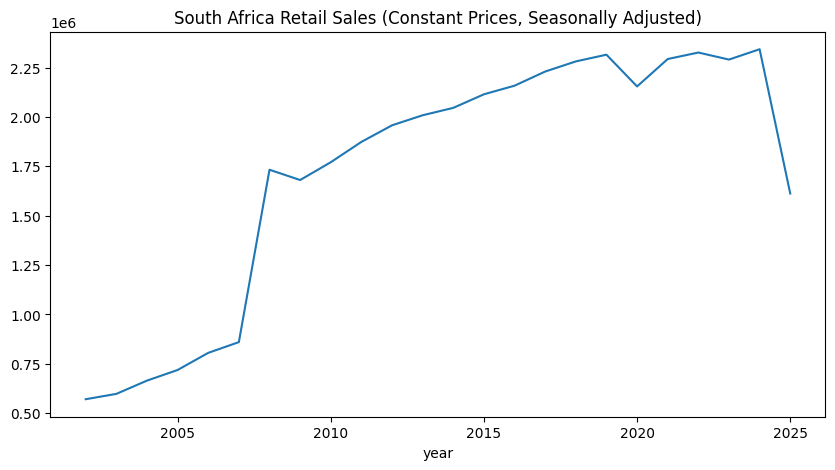

In [88]:
(
    constant_sales
    .groupby("year")["sales_value"]
    .sum()
    .plot(
        title="South Africa Retail Sales (Constant Prices, Seasonally Adjusted)",
        figsize=(10, 5)
    )
)


In [89]:
category_trend = (
    constant_sales
    .groupby(["year", "category"])["sales_value"]
    .sum()
    .reset_index()
)

category_trend.head()


,year,category,sales_value
0,2008,All other retailers,104244.0
1,2008,General dealers,384929.0
2,2008,"Retailers in hardware,paint and glass",91674.0
3,2008,"Retailers in household furniture,appliances an...",27736.0
4,2008,"Retailers in pharmaceutical and medical goods,...",55053.0


In [94]:
df_long.to_csv("outputs/retail_trade_cleaned.csv", index=False)


In [115]:
analysis_df = df_long.copy()

analysis_df.head()


,series_code,category,price_type,adjustment_type,date,sales_value,price_flag,seasonal_adjusted,year,month,quarter
7,con_act,NaN,At constant prices,Actual values,2002-01-01,43977.0,Constant,False,2002,1,2002Q1
8,con_seas,NaN,At constant prices,Seasonally adjusted values,2002-01-01,47303.0,Constant,False,2002,1,2002Q1
9,cur_act,NaN,At current prices,Actual values,2002-01-01,20669.0,Current,False,2002,1,2002Q1
10,cur_seas,NaN,At current prices,Seasonally adjusted values,2002-01-01,22191.0,Current,False,2002,1,2002Q1
39,con_act,NaN,At constant prices,Actual values,2002-02-01,42747.0,Constant,False,2002,2,2002Q1


In [117]:
yearly_sales = (
    analysis_df
    .groupby("year")["sales_value"]
    .sum()
    .reset_index()
)

yearly_sales


,year,sales_value
0,2002,1705916.0
1,2003,1821377.0
2,2004,2036893.0
3,2005,2994382.0
4,2006,3406906.0
5,2007,3737670.0
6,2008,5718912.0
7,2009,5724579.0
8,2010,6071482.0
9,2011,6507617.0


<Axes: title={'center': 'Real Retail Sales Trend in South Africa (Constant Prices)'}, xlabel='year'>

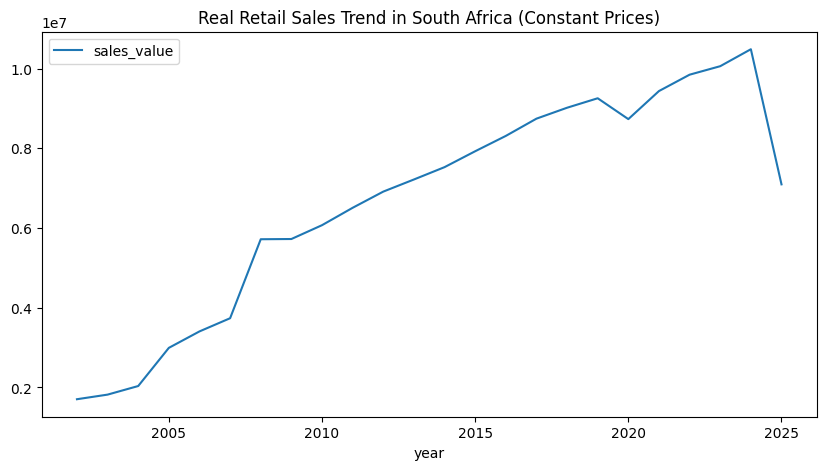

In [118]:
yearly_sales.set_index("year").plot(
    title="Real Retail Sales Trend in South Africa (Constant Prices)",
    figsize=(10,5)
)


The South African retail sector has demonstrated a long term growth trajectory punctuated by significant disruption during 2019/2020 pandemic and subsequent economic challenges. The current outlook suggest that this trend need immediate strategic attention and further investigation into underlying economic factors.


In [119]:
category_year = (
    analysis_df
    .groupby(["year", "category"])["sales_value"]
    .sum()
    .reset_index()
)


In [120]:
category_pivot = category_year.pivot(
    index="year",
    columns="category",
    values="sales_value"
)

category_pivot.head()


category,All other retailers,General dealers,"Retailers in hardware,paint and glass","Retailers in household furniture,appliances and equipment","Retailers in pharmaceutical and medical goods,cosmetics and toiletries","Retailers in textiles,clothing,footwear and leather goods","Retailers of food, beverages and tobacco in specialised stores"
year,,,,,,,
2005,120187.0,297481.0,74820.0,57804.0,43516.0,111905.0,71437.0
2006,138422.0,343987.0,93796.0,66785.0,47580.0,125994.0,80516.0
2007,160125.0,395839.0,105828.0,65757.0,54435.0,138799.0,88159.0
2008,387508.0,1219866.0,301187.0,116800.0,173720.0,372255.0,288122.0
2009,379550.0,1258623.0,258749.0,111480.0,184578.0,374597.0,294714.0


<Axes: title={'center': 'Retail Category Performance (Real Terms)'}, xlabel='year'>

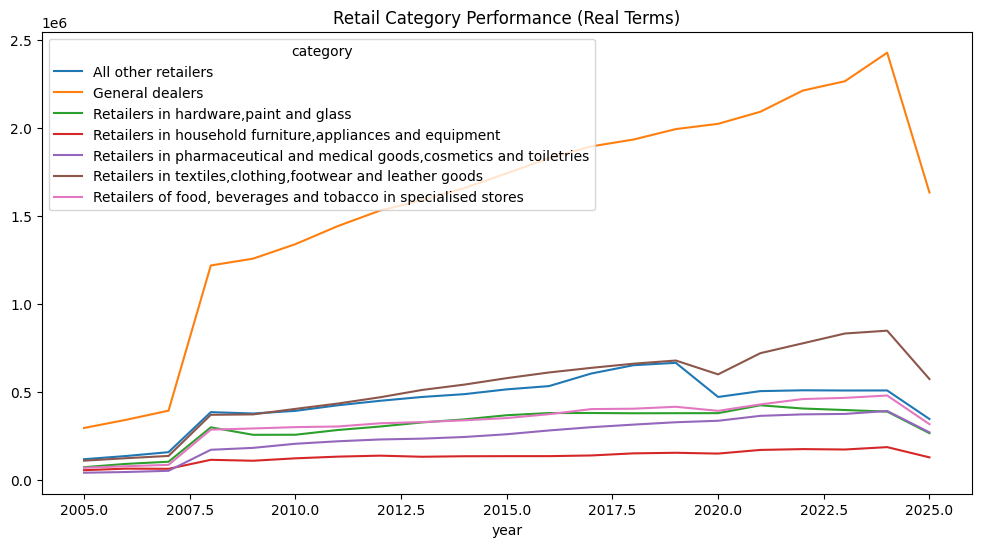

In [121]:
category_pivot.plot(
    figsize=(12,6),
    title="Retail Category Performance (Real Terms)"
)


The data suggest robust, albeit consolidating, retail landscape. Sectors dealing with essential goods like (food and pharmaceuticals) show consistent strength, while discretionary or home-improvement-related sectors like hardware, furniture have faced recent headwinds. The "All Other general retailers" category warrants further investigation to understand its composition and drivers of its high performance.

In [122]:
category_growth = category_pivot.pct_change() * 100
category_growth.tail()


category,All other retailers,General dealers,"Retailers in hardware,paint and glass","Retailers in household furniture,appliances and equipment","Retailers in pharmaceutical and medical goods,cosmetics and toiletries","Retailers in textiles,clothing,footwear and leather goods","Retailers of food, beverages and tobacco in specialised stores"
year,,,,,,,
2021,6.999909,3.386930,11.719464,13.674101,8.262284,19.982885,9.283217
2022,0.923234,5.732252,-4.305993,2.672195,2.286680,7.718653,7.018008
2023,-0.233488,2.407683,-2.091289,-1.274007,0.667706,7.181896,1.488120
2024,0.049590,7.145480,-2.271146,7.695906,4.460551,1.934472,2.850202
2025,-31.764538,-32.682662,-31.397071,-30.756232,-30.790470,-32.305120,-33.803989


### YoY Growth & Inflation Impact

#### Year-on-Year Growth (Total Retail)

In [123]:
yearly_sales["YoY_Growth_%"] = yearly_sales["sales_value"].pct_change() * 100
yearly_sales


,year,sales_value,YoY_Growth_%
0,2002,1705916.0,NaN
1,2003,1821377.0,6.768270
2,2004,2036893.0,11.832586
3,2005,2994382.0,47.007329
4,2006,3406906.0,13.776599
5,2007,3737670.0,9.708633
6,2008,5718912.0,53.007408
7,2009,5724579.0,0.099092
8,2010,6071482.0,6.059887
9,2011,6507617.0,7.183337


<Axes: title={'center': 'Year-on-Year Real Retail Growth (%)'}, xlabel='year'>

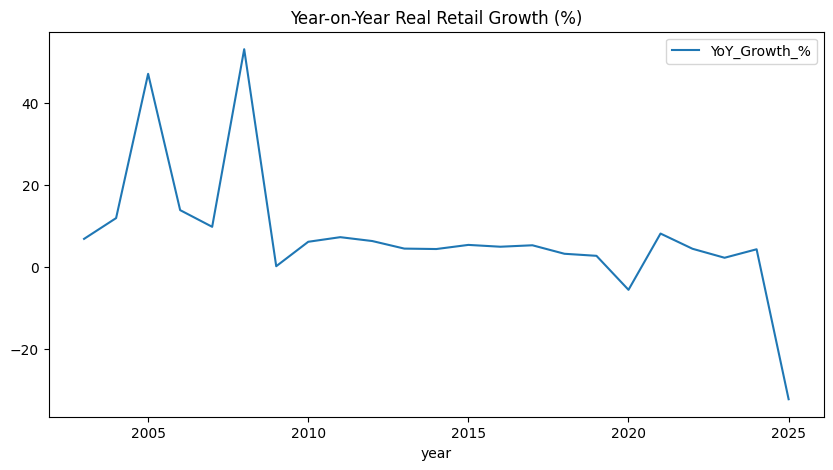

In [124]:
yearly_sales.set_index("year")[["YoY_Growth_%"]].plot(
    title="Year-on-Year Real Retail Growth (%)",
    figsize=(10,5)
)


Despite nominal revenue growth, real retail growth remains weak or negative mostly in recent periods, reflecting inflation-driven consumption pressure.

#### Inflation Impact: Current vs Constant Prices

In [125]:
inflation_df = df_long[
    df_long["adjustment_type"] == "Seasonally adjusted values"
].copy()


In [126]:
inflation_year = (
    inflation_df
    .groupby(["year", "price_type"])["sales_value"]
    .sum()
    .reset_index()
)


In [127]:
inflation_pivot = inflation_year.pivot(
    index="year",
    columns="price_type",
    values="sales_value"
)

inflation_pivot.head()


price_type,At constant prices,At current prices
year,,
2002,571014.0,281634.0
2003,598025.0,311798.0
2004,665185.0,351883.0
2005,718960.0,775443.0
2006,805687.0,895804.0


In [128]:
inflation_pivot["Inflation_Gap"] = (
    inflation_pivot["At current prices"] -
    inflation_pivot["At constant prices"]
)


<Axes: title={'center': 'Nominal vs Real Retail Sales'}, xlabel='year'>

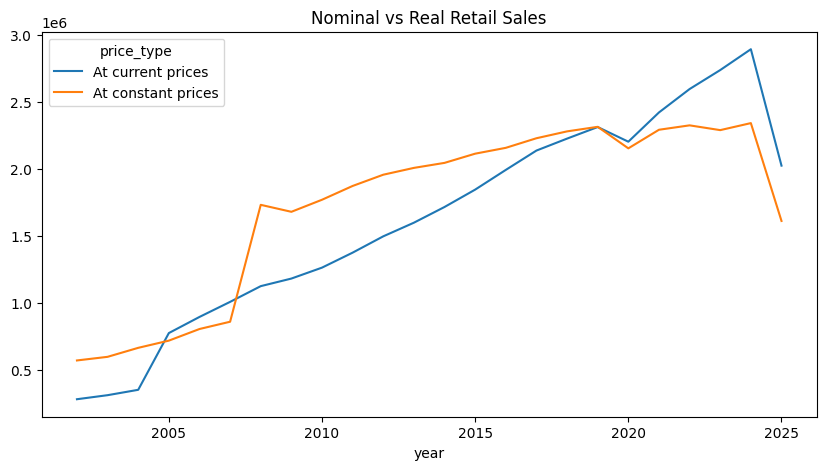

In [129]:
inflation_pivot[["At current prices", "At constant prices"]].plot(
    figsize=(10,5),
    title="Nominal vs Real Retail Sales"
)


In [130]:
analysis_df.shape


(7576, 11)

In [131]:
analysis_df["price_type"].value_counts()


price_type
At current prices     4040
At constant prices    3536
Name: count, dtype: int64

In [132]:
analysis_df.to_csv("outputs/fact_retail_sales.csv", index=False)
